In [1]:

#Librerías
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from google.colab import drive
 


import os
import cv2
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from keras.applications.xception import Xception,preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50
import tensorflow as tf
from keras.preprocessing import image
from keras.layers import Input
from keras.backend import reshape
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt


drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
articulos = pd.read_csv("/content/gdrive/MyDrive/MIA/4T/Proyecto/BasesProyecto/articles.csv",index_col=0)
clientes = pd.read_csv("/content/gdrive/MyDrive/MIA/4T/Proyecto/BasesProyecto/customers.csv",index_col=0)
transacciones = pd.read_csv("/content/gdrive/MyDrive/MIA/4T/Proyecto/BasesProyecto/transactions_train.csv",index_col=0)
usuarios_test=pd.read_csv("/content/gdrive/MyDrive/MIA/4T/Proyecto/BasesProyecto/users_test.csv",index_col=0)

In [ ]:
images_dir = '/content/gdrive/MyDrive/MIA/4T/Proyecto/BasesProyecto/images_rescaled'

# Articulos

1.   article_id: Id del articulo
2. product_code: Codigo articulo
3.   prod_name: Nombre articulo
4. product_type_no: Numero del tipo de articulo
5. prod_name: Nombre articulo
6. product_type_no: Numero del tipo de articulo 
7. product_type_name: Nombre del tipo de artículo
8. product_group_name: Nombre del grupo del artículo
9. graphical_appearance_no: Numero apariencia grafica 
10. graphical_appearance_name: 	Nombre apariencia grafica
11. colour_group_code: Codigo del grupo de color de item	
12. colour_group_name:	Nombre del grupo de color de item
13. department_no:	Numero departamento
14. department_name: Nombre departamento
15. section_no:	Numero seccion
16. garment_group_name:	Nombre del grupo del item
17. detail_desc:Descripcion item




In [3]:
articulos.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,department_no,department_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,1676,Jersey Basic,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,1676,Jersey Basic,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1676,Jersey Basic,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,1339,Clean Lingerie,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,1339,Clean Lingerie,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [4]:
# Numero de registros únicos en cada columna
for col in articulos.columns:
    if not 'no' in col and not 'code' in col and not 'id' in col:
        un_n = articulos[col].nunique()
        print(f'n of unique {col}: {un_n}')

n of unique prod_name: 35940
n of unique product_type_name: 125
n of unique product_group_name: 18
n of unique graphical_appearance_name: 30
n of unique colour_group_name: 50
n of unique department_name: 245
n of unique section_name: 56
n of unique garment_group_name: 21
n of unique detail_desc: 33900


In [5]:
#Productos dentro de cada categoría de grupo
pd.options.display.max_rows = None
articulos.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                3
                       Alice band                     5
                       Baby Bib                       3
                       Bag                          978
                       Beanie                        29
                       Belt                         367
                       Bracelet                     119
                       Braces                         3
                       Bucket hat                     5
                       Cap                           11
                       Cap/peaked                   301
                       Dog Wear                      20
                       Earring                      950
                       Earrings                      11
                       Felt hat                       8
                       Giftbox                        9
                       Gloves                       214


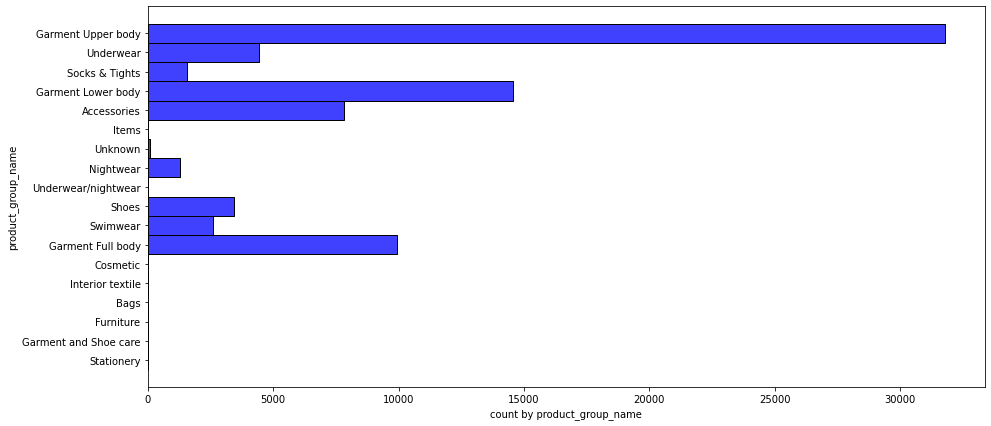

In [ ]:
#Categoría de productos (product_group_name)
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articulos, y='product_group_name', color='blue')
ax.set_xlabel('count by product_group_name')
ax.set_ylabel('product_group_name')
plt.show()

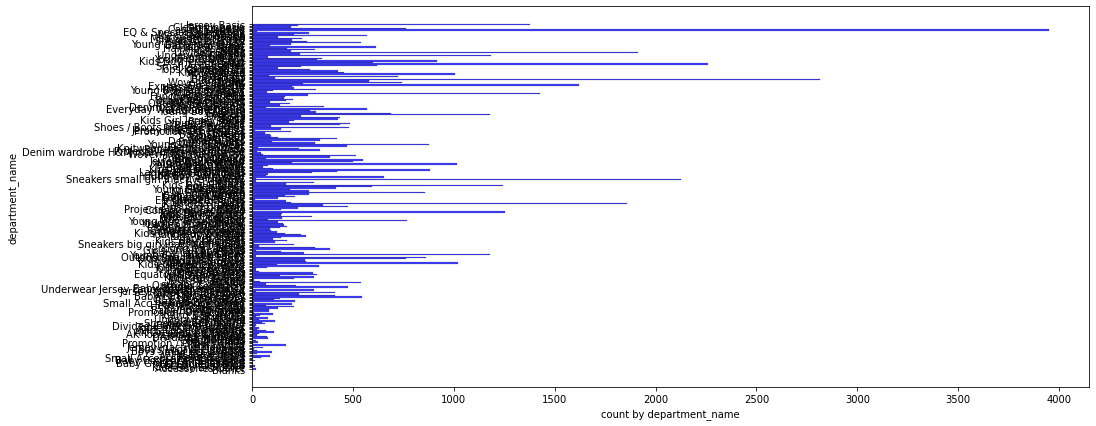

In [ ]:
#Departamento al que pertenece producto (department_name)
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articulos, y='department_name', color='blue')
ax.set_xlabel('count by department_name')
ax.set_ylabel('department_name')
plt.show()

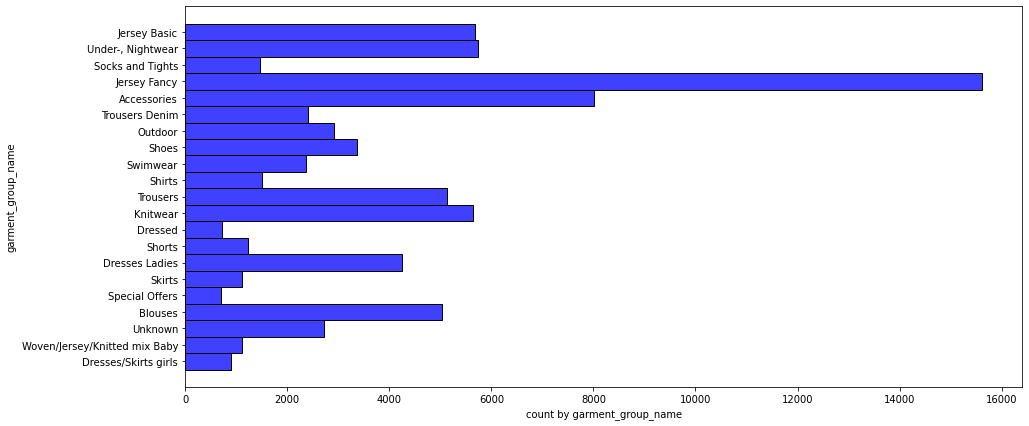

In [ ]:
#Nombre del grupo del producto
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articulos, y='garment_group_name', color='blue')
ax.set_xlabel('count by garment_group_name')
ax.set_ylabel('garment_group_name')
plt.show()

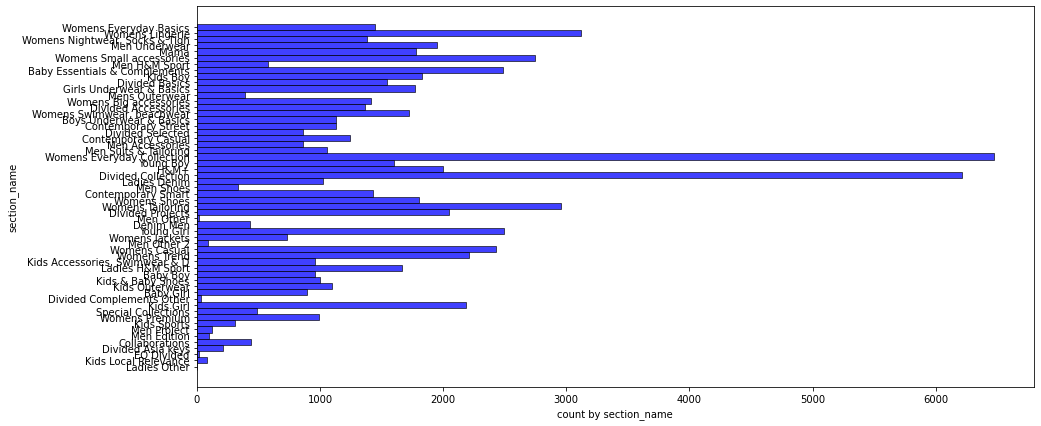

In [ ]:
#Tipo de productos
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articulos, y='section_name', color='blue')
ax.set_xlabel('count by section_name')
ax.set_ylabel('section_name')
plt.show()

# Clientes

1. customer_id: id del usuario
2. club_member_status: estado de su membresía
3. age: edad
4. postal_code: codigo postal


In [5]:
pd.options.display.max_rows = 50
clientes.head


<bound method NDFrame.head of                                              customer_id club_member_status  \
0      000226b9ea81019249060b376b516f821a80e9b24f89a7...             ACTIVE   
1      000303d20b953d06dcf8c6db2d05616383a88ac84bf054...             ACTIVE   
2      0003e7b27d3dd2295e609bcc017e96a05f322cd25fdaa7...             ACTIVE   
3      000416152a81973bebab23142bd5dd6ebd85c8c5e2d63e...             ACTIVE   
4      000493dd9fc463df1acc2081450c9e75ef8e87d5dd17ed...             ACTIVE   
...                                                  ...                ...   
44995  fff871bf24b40fd1290215414d760afaa69bb164d2b970...             ACTIVE   
44996  fff928730466cde2f16c50c0921c96279b7386f9433756...             ACTIVE   
44997  fff9e830d0c21559ef730da1023cadb4c141597ad1e366...             ACTIVE   
44998  fffb0ca7aca4f24df1b00a578d5b692ed7f83ffec7c37d...             ACTIVE   
44999  fffcd556af797bddc25d6d56600b6e298a19b90624a8ee...             ACTIVE   

        age          

In [6]:
#No hay Id de cleintes repetidos
clientes.shape[0] - clientes['customer_id'].nunique()

0

In [ ]:
#Agrupamiento por codigo postal
codigo_postal_unico = clientes.groupby('postal_code', as_index=False).count().sort_values('customer_id', ascending=False)
codigo_postal_unico

,postal_code,customer_id,club_member_status,age
6690,2c29ae653a9282cce4151bd87643c907644e09541abc28...,1975,1933,1930
31274,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,8,8,8
19019,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,8,8,8
13903,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,7,7,7
26782,af12619e8d7c308050b242b86d4b3e5ce22b49c077c098...,7,7,7
...,...,...,...,...
13650,59d2c38cbcf100d965bcbca2cfd29efa098b40d9fe2253...,1,1,1
13651,59d6c7e1a2d9e994ef6ed6871a633a11b22bdb84ba0720...,1,1,1
13652,59d70d6e3eafc107ca7da37ae4b6a3c3b1930508c689c6...,1,1,1
13653,59d9bac227acf5ce44f60f361d941ee7feddd1bce390f2...,1,1,1


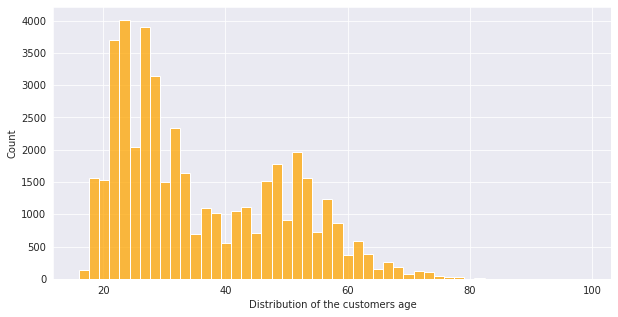

In [ ]:
#Distribución edad
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=clientes, x='age', bins=50, color='orange')
ax.set_xlabel('Distribution de edad de clientes')
plt.show()

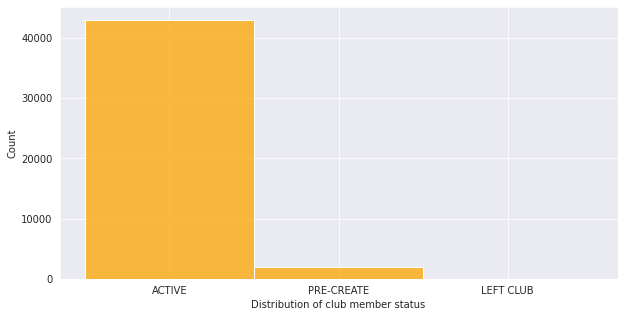

In [ ]:
#Status de membresía
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=clientes, x='club_member_status', color='orange')
ax.set_xlabel('Distribution of club member status')
plt.show()

# Transacciones

1. customer_id: id del usuario
2. article_id: el id del artículo
3. t_dat: la fecha de la transacción
4. price: el precio del articulo
5. sales_channel_id: Id del canal de venta

In [83]:
pd.options.display.max_rows = 50
transacciones.head

<bound method NDFrame.head of               t_dat                                        customer_id  \
0        2018-11-28  1f293f035403ce2d1ff0cdb23cc3faf8b1c2ad04dbedbe...   
1        2018-11-28  1f293f035403ce2d1ff0cdb23cc3faf8b1c2ad04dbedbe...   
2        2019-03-28  1f293f035403ce2d1ff0cdb23cc3faf8b1c2ad04dbedbe...   
3        2019-03-28  1f293f035403ce2d1ff0cdb23cc3faf8b1c2ad04dbedbe...   
4        2019-03-28  1f293f035403ce2d1ff0cdb23cc3faf8b1c2ad04dbedbe...   
...             ...                                                ...   
1318496  2019-09-10  3c0c198b6c04d50b639ca8128c3010603f34b37896bbf8...   
1318497  2019-09-20  3c0c198b6c04d50b639ca8128c3010603f34b37896bbf8...   
1318498  2019-09-20  3c0c198b6c04d50b639ca8128c3010603f34b37896bbf8...   
1318499  2019-09-20  3c0c198b6c04d50b639ca8128c3010603f34b37896bbf8...   
1318500  2019-09-22  3c0c198b6c04d50b639ca8128c3010603f34b37896bbf8...   

         article_id     price  sales_channel_id  
0         655265001  0.025407  

In [ ]:
#Trabajo imágenes
def getImagePaths(path):
    """
    Function to Combine Directory Path with individual Image Paths
    
    parameters: path(string) - Path of directory
    returns: image_names(string) - Full Image Path
    """
    image_names = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            fullpath = os.path.join(dirname, filename)
            image_names.append(fullpath)
    return image_names

def preprocess_img(img_path):
    dsize = (225,225)
    new_image=cv2.imread(img_path)
    new_image=cv2.resize(new_image,dsize,interpolation=cv2.INTER_NEAREST)  
    new_image=np.expand_dims(new_image,axis=0)
    new_image=preprocess_input(new_image)
    return new_image

def load_data():
    output=[]
    output=getImagePaths(images_dir)[:10000]
    return output

In [ ]:
#Definición modelo y extracción de features
def model():
    model=ResNet50(weights='imagenet',include_top=False)
    for layer in model.layers:
        layer.trainable=False
        #model.summary()
    return model

def feature_extraction(image_data,model):
    features=model.predict(image_data)
    features=np.array(features)
    features=features.flatten()
    return features

In [ ]:
# Encontrar imagen similar a través de vecinos cercanos y similaridad coseno

def result_vector_cosine(model,feature_vector,new_img):
    new_feature = model.predict(new_img)
    new_feature = np.array(new_feature)
    new_feature = new_feature.flatten()
    N_result = 12
    nbrs = NearestNeighbors(n_neighbors=N_result, metric="cosine").fit(feature_vector)
    distances, indices = nbrs.kneighbors([new_feature])
    return(indices)

1/1 [==============================] - 0s 24ms/step


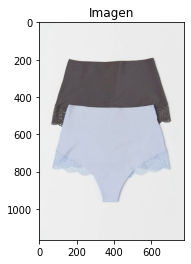

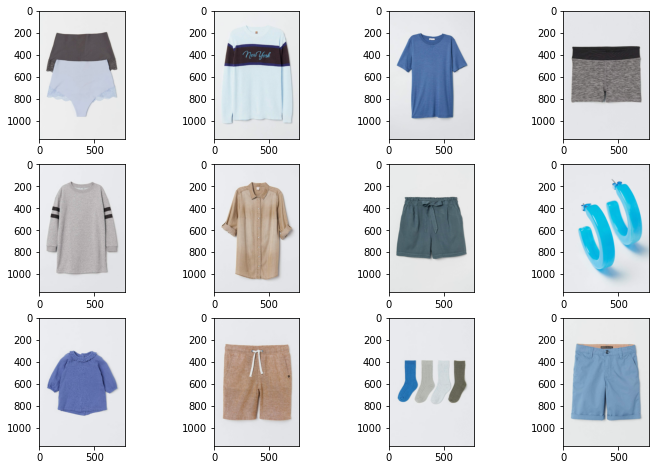

In [ ]:
def input_show(data):
    plt.title("Imagen")
    plt.imshow(data)
  
def show_result(data,result):
    fig = plt.figure(figsize=(12,8))
    for i in range(0,12):
        index_result=result[0][i]
        plt.subplot(3,4,i+1)
        plt.imshow(cv2.imread(data[index_result]))
    plt.show()

def main():  
    features=[]
    output=load_data()
    main_model=model()
    #Limiting the data for training
    for i in output[:999]:
        new_img=preprocess_img(i)
        features.append(feature_extraction(new_img,main_model))
    feature_vec = np.array(features)
    result=result_vector_cosine(main_model,feature_vec,preprocess_img(output[200]))
    input_show(cv2.imread(output[200]))
    show_result(output,result)
  

if __name__=='__main__':
    main()

In [42]:
def apk(actual, predicted, k=10):
    """
    Computes the average precision at k.
    This function computes the average prescision at k between two lists of
    items.
    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The average precision at k over the input lists
    """
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    # remove this case in advance
    # if not actual:
    #     return 0.0

    return score / min(len(actual), k)


def mapk(actual, predicted, k=10):
    """
    Computes the mean average precision at k.
    This function computes the mean average prescision at k between two lists
    of lists of items.
    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted 
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The mean average precision at k over the input lists
    """
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

In [2]:
#Modelo ALS

from google.colab import data_table
#from vega_datasets import data

data_table.enable_dataframe_formatter()


'''
articulos = pd.read_csv("/content/gdrive/MyDrive/MIA/4T/Proyecto/BasesProyecto/articles.csv",index_col=0)
clientes = pd.read_csv("/content/gdrive/MyDrive/MIA/4T/Proyecto/BasesProyecto/customers.csv",index_col=0)
transacciones = pd.read_csv("/content/gdrive/MyDrive/MIA/4T/Proyecto/BasesProyecto/transactions_train.csv",index_col=0)
usuarios_test=pd.read_csv("/content/gdrive/MyDrive/MIA/4T/Proyecto/BasesProyecto/users_test.csv",index_col=0)
'''
%time
transacciones = pd.read_csv("/content/gdrive/MyDrive/MIA/4T/Proyecto/BasesProyecto/transactions_train.csv",index_col=0,sep=',')
transacciones.head(10)



CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.82 µs


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-11-28,1f293f035403ce2d1ff0cdb23cc3faf8b1c2ad04dbedbe...,655265001,0.025407,2
1,2018-11-28,1f293f035403ce2d1ff0cdb23cc3faf8b1c2ad04dbedbe...,537688014,0.050831,2
2,2019-03-28,1f293f035403ce2d1ff0cdb23cc3faf8b1c2ad04dbedbe...,698877002,0.042356,2
3,2019-03-28,1f293f035403ce2d1ff0cdb23cc3faf8b1c2ad04dbedbe...,382127027,0.032186,2
4,2019-03-28,1f293f035403ce2d1ff0cdb23cc3faf8b1c2ad04dbedbe...,610776001,0.008458,2
5,2019-05-17,b4ba419fd5afc5eb274ab3ae1638a51a2e916b4deb0a5c...,647826001,0.016932,2
6,2019-10-03,b4ba419fd5afc5eb274ab3ae1638a51a2e916b4deb0a5c...,754697001,0.017610,2
7,2019-10-03,b4ba419fd5afc5eb274ab3ae1638a51a2e916b4deb0a5c...,754697001,0.017610,2
8,2019-09-03,1a1563c28f0d8781ad87f76e0a5af0485003e350f541dd...,801673004,0.016932,2
9,2019-09-03,1a1563c28f0d8781ad87f76e0a5af0485003e350f541dd...,448509001,0.042356,2


In [64]:
#Veremos columnas que se usarán
columnas_transacciones=['customer_id', 'article_id', 'price']
transacciones=transacciones[columnas_transacciones]

#Si cliente compra mismo items se suma 1
transacciones.loc[:,"count"]=1



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [65]:
transacciones.describe()

,article_id,price,count
count,1.318501e+06,1.318501e+06,1318501.0
mean,6.840127e+08,2.803561e-02,1.0
std,1.288764e+08,1.953588e-02,0.0
min,1.087750e+08,1.525424e-04,1.0
25%,6.244860e+08,1.574576e-02,1.0
50%,7.047560e+08,2.540678e-02,1.0
75%,7.664400e+08,3.388136e-02,1.0
max,9.481520e+08,5.915254e-01,1.0


In [66]:
#como precio subordinado a articulo
transacciones=transacciones.groupby(['customer_id','article_id'], as_index=False).sum()




In [67]:
transacciones.describe()

,article_id,price,count
count,1.125920e+06,1.125920e+06,1.125920e+06
mean,6.856343e+08,3.283092e-02,1.171043e+00
std,1.259046e+08,2.998607e-02,5.705251e-01
min,1.087750e+08,1.525424e-04,1.000000e+00
25%,6.261680e+08,1.693220e-02,1.000000e+00
50%,7.048740e+08,2.540678e-02,1.000000e+00
75%,7.664020e+08,4.066102e-02,1.000000e+00
max,9.481520e+08,2.532203e+00,1.660000e+02


In [55]:
#Se buscarán usuarios asi como artículos

cliente=transacciones['customer_id'].unique()
articulo=transacciones['article_id'].unique()


print(len(cliente))
print(len(articulos))






45000
73080


In [ ]:
#Indizar
#clientes_to_idx = {v:k for k,v in enumerate(cliente)}
#articulos_to_idx = {v:k for k,v in enumerate(articulo)}




In [52]:
!pip install pandas --upgrade
!pip install implicit --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.6 MB 266 kB/s 


In [68]:
from scipy.sparse import csr_matrix
import os
import numpy as np

from implicit.als import AlternatingLeastSquares


In [54]:
#Evitar Multithr. en compt.
os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'

In [70]:
#Crear matriz sparse 
from scipy.sparse import csr_matrix
cliente_n=transacciones['customer_id'].nunique()
articulo_n=transacciones['article_id'].nunique()


csr_trans = csr_matrix((transacciones['count'], (transacciones.customer_id, transacciones.article_id)), shape= (cliente_n, articulo_n))

ValueError: ignored

In [73]:
cliente_n=transacciones['customer_id'].nunique()
transacciones.customer_id


0          000226b9ea81019249060b376b516f821a80e9b24f89a7...
1          000226b9ea81019249060b376b516f821a80e9b24f89a7...
2          000226b9ea81019249060b376b516f821a80e9b24f89a7...
3          000226b9ea81019249060b376b516f821a80e9b24f89a7...
4          000226b9ea81019249060b376b516f821a80e9b24f89a7...
                                 ...                        
1125915    fffcd556af797bddc25d6d56600b6e298a19b90624a8ee...
1125916    fffcd556af797bddc25d6d56600b6e298a19b90624a8ee...
1125917    fffcd556af797bddc25d6d56600b6e298a19b90624a8ee...
1125918    fffcd556af797bddc25d6d56600b6e298a19b90624a8ee...
1125919    fffcd556af797bddc25d6d56600b6e298a19b90624a8ee...
Name: customer_id, Length: 1125920, dtype: object

#Análisis Most Popular para los 10 ítems





In [45]:

#10 Most Popular items

#Bases a usar

transacciones = pd.read_csv("/content/gdrive/MyDrive/MIA/4T/Proyecto/BasesProyecto/transactions_train.csv",sep=',', usecols= ['t_dat', 'customer_id', 'article_id'], dtype={'article_id': 'int32'})
clientes = pd.read_csv("/content/gdrive/MyDrive/MIA/4T/Proyecto/BasesProyecto/customers.csv",sep=',', usecols= ['customer_id'])

#Split Train Test
test_start_date = '2020-04-28'
train_df = transacciones.query(f"t_dat < '{test_start_date}'").reset_index(drop=True)
test_df = transacciones.query(f"t_dat >= '{test_start_date}'").reset_index(drop=True)

#Ordenar 
train_df = train_df.sort_values(["customer_id", "t_dat"], ascending=False)
test_df = test_df.sort_values(["customer_id", "t_dat"], ascending=False)


In [ ]:
train_df

In [46]:
#Ordenar las bases
test_df=test_df.sort_values(['customer_id', 't_dat'], ascending = [True, True]) 

test_cust=test_df.groupby('customer_id')['article_id'].apply(list).reset_index()

test_cust['test_true'] = test_cust['article_id'].map(lambda x: '0'+' 0'.join(str(x)[1:-1].split(', ')))

del test_df, test_cust['article_id']


In [20]:
test_cust

,customer_id,test_true
0,00bce12709bdc1536ee25bc63e229d3746960b20cbbb75...,0914537002 0914537002 0869331006 0868823008 08...
1,01e464bf74b13a55df22de1528eff2b33749c0cd92953b...,0885543003 0885543004 0885543004 0885543006 08...
2,056612883ea2ae836e8f16413f58ace32bce24af25a10f...,0836997011 0763275020 0879781002 0598755015 08...
3,0b84ef7b4f8e6b4598c94e12a26e3d8bce525f4cc57c77...,0806131001 0863583001
4,0bbc032a8be7762f31567e5e8ae2b840e3dd97f325b929...,0856270002 0804992014 0863284001 0806783001 09...
...,...,...
276,fdba117468745417f6d95b1c10f352d779e7081a207321...,0840475001 0697498001 0817260006
277,fe041bebc67e544eb0599b82e0df9d7c2f7427cd44ddca...,0921347004 0925666001 0925666001 0923576001 09...
278,fe478b34b9854451eb873cb37e6d029877990f8a40ac9a...,0928719001 0928719001
279,ff29ad5fea1c94ab322ef5c2e45941ea7acde9a1bdb800...,0887659003


In [52]:
#Selección de los ítems más populares
n_items=10
desde_fecha= "2020-09-20"
top_n_items=transacciones[transacciones['t_dat'] > desde_fecha].groupby('article_id')['customer_id'].nunique().sort_values(ascending=False).head(n_items).index.tolist()

top_n_items = ['0' + str(item) for item in top_n_items]

prediccion_most_popular=clientes.copy()

prediccion_most_popular['prediccion'] = ' '.join(top_n_items)

prediccion_most_popular = test_cust.merge(prediccion_most_popular, on ='customer_id', how ='left')

In [53]:
#ïtems más populares
top_n_items

['0456163060',
 '0717490058',
 '0930380001',
 '0717490008',
 '0874704002',
 '0805947006',
 '0903276001',
 '0797710004',
 '0762846027',
 '0881111005']

In [56]:
#Dataframe con artículos comprados reales vs los 10 más populares
prediccion_most_popular.head(5)

,customer_id,test_true,prediccion
0,000303d20b953d06dcf8c6db2d05616383a88ac84bf054...,0850176003 0688537004,0456163060 0717490058 0930380001 0717490008 08...
1,000493dd9fc463df1acc2081450c9e75ef8e87d5dd17ed...,0706016002 0706016001 0820827002 0700926002 03...,0456163060 0717490058 0930380001 0717490008 08...
2,000989f72a2b8e5da2f4abafc86c2e213816fa2ff2a060...,0589549011 0488561003 0685814003 0570002013 05...,0456163060 0717490058 0930380001 0717490008 08...
3,000a5f3c8be9167cb0d09dd8a17b6b54998e9e83faaf52...,0860322002 0886241003 0907613001 0889010001 08...,0456163060 0717490058 0930380001 0717490008 08...
4,00166640b52138ab8e804f5e3b1fabdc4a4f696db21e17...,0832309007 0351484033 0589599010 0631878001 08...,0456163060 0717490058 0930380001 0717490008 08...


In [55]:
#Cálculo de MAPK en test para 10 artículos más populares
mapk(
    prediccion_most_popular['test_true'].map(lambda x: x.split()), 
    prediccion_most_popular['prediccion'].map(lambda x: x.split()), 
    k=10
)

0.0006623353690103275